In [1]:
# This is for testing for hysteresis and slop using frames
# with thermal pinhole images

# created 2019 June 23 by E.S.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os
import gc
from astropy.io import fits
import pandas as pd
import glob
import photutils
from matplotlib import patches
from matplotlib.patches import Circle
from photutils import DAOStarFinder
%matplotlib inline
#%matplotlib qt

In [2]:
stem = "/Volumes/seagate_external_drive/lbti_data_reduction/hysteresis_slop/"

In [3]:
def make_median(date_string, start_frame_num, save_name):
    '''
    Make median of five frames, starting with the one with the starting frame number
    '''
    
    # initialize cube
    frame_cube = np.nan*np.ones((5,2048,2048))
    
    for t in range(0,5):
            
        # read in image
        sciImg, header = fits.getdata(stem + "lm_"+date_string+"_"+
                                      '%06i'%(start_frame_num+t)+".fits",
                                      0,header=True)
        
        # take first slice if there's just one
        frame_cube[t,:,:] = sciImg[0,:,:]
        
        # take second slice, if it's a cube
        #frame_cube[t,:,:] = sciImg[1,:,:]
    
        # take median
        median_frame_cube = np.median(frame_cube, axis = 0).astype(np.uint16)

    hdu = fits.PrimaryHDU(median_frame_cube)
    hdulist = fits.HDUList([hdu])
    hdu.writeto(save_name, overwrite=True)

In [4]:
def make_median_dark_subt(date_string, start_frame_num, dark_name, save_name):
    '''
    Same as above, but with dark subtraction added in
    '''
    
    # initialize cube
    frame_cube = np.nan*np.ones((5,2048,2048))
    
    for t in range(0,5):
            
        # read in image
        sciImg, header = fits.getdata(stem + "lm_"+date_string+"_"+
                                      '%06i'%(start_frame_num+t)+".fits",
                                      0,header=True)
        

        # if the science frame is just one slice
        frame_cube[t,:,:] = sciImg[0,:,:]

        # take second slice, if it's a cube
        #frame_cube[t,:,:] = sciImg[1,:,:]
    
        # take median
        median_frame_cube = np.median(frame_cube, axis = 0).astype(np.uint16)
        
        # dark-subtract
        dark, header = fits.getdata(dark_name,
                                      0,header=True)
        
    frame_dark_subt = np.subtract(median_frame_cube,dark)

    hdu = fits.PrimaryHDU(frame_dark_subt)
    hdulist = fits.HDUList([hdu])
    hdu.writeto(save_name, overwrite=True)

In [5]:
def make_median_dark_subt_single(date_string, sci_frame_num, dark_name, save_name):
    '''
    Same as above, but for single frames
    '''
    
    # initialize cube
    frame_cube = np.nan*np.ones((5,2048,2048))
            
    # read in image
    sciImg, header = fits.getdata(stem + "lm_"+date_string+"_"+
                                      '%06i'%(sci_frame_num)+".fits",
                                      0,header=True)
        
    # dark-subtract
    dark, header = fits.getdata(stem + dark_name,0,header=True)
        
    frame_dark_subt = np.subtract(sciImg,dark)

    hdu = fits.PrimaryHDU(frame_dark_subt)
    hdulist = fits.HDUList([hdu])
    hdu.writeto(save_name, overwrite=True)

In [7]:
#make_median("190217", 11, "med_dark.fits")
make_median_dark_subt("190217", 16, "med_016_020.fits")
make_median_dark_subt("190217", 21, "med_021_025.fits")
make_median_dark_subt("190217", 26, "med_026_030.fits")
make_median_dark_subt("190217", 31, "med_031_035.fits")
make_median_dark_subt("190217", 36, "med_036_040.fits")
make_median_dark_subt("190217", 41, "med_041_045.fits")
make_median_dark_subt("190217", 46, "med_046_050.fits")

In [22]:
make_median("190705", 11, "med_dark_190705.fits")
make_median_dark_subt("190705", 16, "med_dark_190705.fits", "med_016_020_190705.fits")
make_median_dark_subt("190705", 21, "med_dark_190705.fits", "med_021_025_190705.fits")
make_median_dark_subt("190705", 26, "med_dark_190705.fits", "med_026_030_190705.fits")
make_median_dark_subt("190705", 31, "med_dark_190705.fits", "med_031_035_190705.fits")
make_median_dark_subt("190705", 36, "med_dark_190705.fits", "med_036_040_190705.fits")
make_median_dark_subt("190705", 41, "med_dark_190705.fits", "med_041_045_190705.fits")
make_median_dark_subt("190705", 46, "med_dark_190705.fits", "med_046_050_190705.fits")

/Users/nyumbani/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median for 4194304 results
  r = func(a, **kwargs)


In [8]:
make_median_dark_subt("190218", 6, "med_190218_006_010.fits")
make_median_dark_subt("190218", 11, "med_190218_011_015.fits")
make_median_dark_subt("190218", 16, "med_190218_016_020.fits")
make_median_dark_subt("190218", 21, "med_190218_021_025.fits")
make_median_dark_subt("190218", 26, "med_190218_026_030.fits")
make_median_dark_subt("190218", 31, "med_190218_031_035.fits")
make_median_dark_subt("190218", 36, "med_190218_036_040.fits")
make_median_dark_subt("190218", 41, "med_190218_041_045.fits")
make_median_dark_subt("190218", 46, "med_190218_046_050.fits")
make_median_dark_subt("190218", 51, "med_190218_051_055.fits")
make_median_dark_subt("190218", 56, "med_190218_056_060.fits")
make_median_dark_subt("190218", 61, "med_190218_061_065.fits")
make_median_dark_subt("190218", 66, "med_190218_066_070.fits")
make_median_dark_subt("190218", 71, "med_190218_071_075.fits")
make_median_dark_subt("190218", 76, "med_190218_076_080.fits")
make_median_dark_subt("190218", 81, "med_190218_081_085.fits")
make_median_dark_subt("190218", 86, "med_190218_086_090.fits")
make_median_dark_subt("190218", 91, "med_190218_091_095.fits")
make_median_dark_subt("190218", 96, "med_190218_096_100.fits")
make_median_dark_subt("190218", 101, "med_190218_101_105.fits")
make_median_dark_subt("190218", 106, "med_190218_106_110.fits")
make_median_dark_subt("190218", 111, "med_190218_111_115.fits")
make_median_dark_subt("190218", 116, "med_190218_116_120.fits")
make_median_dark_subt("190218", 121, "med_190218_121_125.fits")

In [6]:
make_median_dark_subt_single("190705", 231, "lm_190705_000226.fits", "dark_subt_0231.fits")

In [13]:
def centroid_psf(file_name, mask=False):
    '''
    Read in an image and get a precise center of the PSF
    '''
    
    plt.clf()
    
    # read in image
    sciImg, header = fits.getdata(file_name,0,header=True)
    
    # take 1st slice
    sciImg = sciImg[1,:,:]
    
    daofind = DAOStarFinder(fwhm=40, threshold=1500, exclude_border=True)
    
    # mask rest of image
    if mask:
        piece_to_keep_top = sciImg[943:1043,1675:1775]
        piece_to_keep_bottom = sciImg[613:713,780:960]
        sciImg = np.median(sciImg)*np.ones(np.shape(sciImg))
        sciImg[943:1043,1675:1775] = piece_to_keep_top
        sciImg[613:713,780:960] = piece_to_keep_bottom   
        
    # kludge for 1 pixel
    sciImg[1135,1567] = sciImg[1135,1566]
    
    sources = daofind(sciImg)
    
    plt.imshow(sciImg, origin="lower")
    plt.scatter([sources["xcentroid"]],[sources["ycentroid"]])
    plt.show()
    
    print(sources)

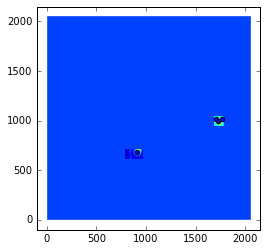

 id   xcentroid     ycentroid   ...  peak       flux          mag      
--- ------------- ------------- ... ------ ------------- --------------
  1 910.700420257 678.270944825 ... 4795.0 26.4635514852 -3.55662031835
  2 1725.22064794 990.789830893 ... 6005.0 19.0674307082 -3.20073044205
  3  1764.9490409 1011.44500107 ... 1472.0  5.0010012227 -1.74764240182
  4 1702.86754072 1018.37750084 ... 1513.0 6.95739117259 -2.10611605458


In [16]:
centroid_psf("dark_subt_0231.fits", mask = True)

In [10]:
make_median_dark_subt_single("190705", 232, "lm_190705_000226.fits", "dark_subt_0232.fits")

In [11]:
centroid_psf("dark_subt_0232.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak       flux           mag      
--- ------------- ------------- ... ------ ------------- ---------------
  1 882.884762764 661.973165556 ... 5072.0 4.69069402896  -1.67809276278
  2 1693.60644587 963.357518913 ... 1255.0 1.48032063947 -0.425889485902
  3 1730.02094171 985.239906969 ... 5886.0 2.78811832269  -1.11327800122
  4 1757.16818855 1021.55782095 ... 1519.0 1.79511968542 -0.635233523632
  5 1691.31877723 1028.13833373 ... 1577.0 2.38607361577 -0.944209596272


In [12]:
make_median_dark_subt_single("190705", 233, "lm_190705_000226.fits", "dark_subt_0233.fits")

In [13]:
centroid_psf("dark_subt_0233.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak       flux           mag      
--- ------------- ------------- ... ------ ------------- ---------------
  1 882.381778945 661.746211286 ... 5024.0 4.71287137221  -1.68321396694
  2  1692.3196266 962.295169181 ... 1142.0 1.41275123726 -0.375164240795
  3  1744.6048372 967.075202404 ... 1941.0  1.9575265631 -0.729269160066
  4 1734.94610821 985.498959215 ... 5591.0 2.98203176113  -1.18628066185
  5  1757.4813691 1019.19973689 ... 1462.0 1.72197292277 -0.590065795226
  6 1692.11739062 1028.61906779 ... 1629.0 2.37541614273 -0.939349258753


In [14]:
make_median_dark_subt_single("190705", 234, "lm_190705_000226.fits", "dark_subt_0234.fits")

In [15]:
centroid_psf("dark_subt_0234.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak       flux           mag      
--- ------------- ------------- ... ------ ------------- ---------------
  1 881.784335192 661.525693397 ... 5121.0 4.73576174365  -1.68847461223
  2   1691.598744 962.086310988 ... 1189.0 1.45173535421 -0.404718633398
  3 1740.27560162 984.305037509 ... 5614.0  2.9901890494  -1.18924661673
  4 1750.11838688  988.39710205 ... 4257.0 3.56219154579  -1.37929317148
  5 1757.60730455   1014.156939 ... 1414.0  1.6122525571  -0.51858268605
  6 1692.69344075 1028.74962486 ... 1613.0 2.43208623538 -0.964947424536


In [16]:
make_median_dark_subt_single("190705", 235, "lm_190705_000226.fits", "dark_subt_0235.fits")

In [17]:
centroid_psf("dark_subt_0235.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak       flux           mag      
--- ------------- ------------- ... ------ ------------- ---------------
  1 881.448192641  661.21894732 ... 4635.0 4.69788221492  -1.67975530992
  2 886.226528746 666.289772259 ... 3801.0 3.32613519673   -1.3048497448
  3 1745.07693647 969.608425807 ... 2160.0 1.99972075004 -0.752423382678
  4 1736.34407862 984.106709113 ... 5679.0 2.93671225581  -1.16965348919
  5 1757.06329137 1018.28332104 ... 1570.0 1.70453920639 -0.579017487401
  6 1692.27120643 1028.53418089 ... 1742.0 2.51481177148  -1.00126371138


In [8]:
make_median_dark_subt_single("190705", 236, "lm_190705_000226.fits", "dark_subt_0236.fits")

In [9]:
centroid_psf("dark_subt_0236.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak       flux           mag      
--- ------------- ------------- ... ------ ------------- ---------------
  1 881.118873508 661.057007925 ... 4772.0 4.70840461474  -1.68218444171
  2  1746.8409615 963.528643926 ... 1668.0 1.83131829795 -0.656909586903
  3  1693.7475682 963.320346486 ... 1192.0 1.36264157025 -0.335954084686
  4 1732.53036499 983.745578085 ... 6319.0 2.90652899991  -1.15843665122
  5 1757.75250082 1020.65496055 ... 1434.0 1.73886525779 -0.600664826101
  6 1692.25159484 1028.42862955 ... 1816.0 2.44276114891 -0.969702510266


In [11]:
make_median_dark_subt_single("190705", 237, "lm_190705_000226.fits", "dark_subt_0237.fits")
centroid_psf("dark_subt_0237.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak       flux           mag      
--- ------------- ------------- ... ------ ------------- ---------------
  1 880.565375611 660.584073273 ... 4647.0  4.7176490853  -1.68431408364
  2 1748.33265381 960.558161547 ... 1571.0 1.86317417908 -0.675633642173
  3 1697.94074614 964.877558241 ... 1348.0 1.24125098929   -0.2346490191
  4 1728.84818686 983.377365714 ... 5852.0 2.80824910486  -1.12108907281
  5 1758.16219617 1022.54195875 ... 1512.0 1.76645184874 -0.617754509027
  6  1692.5180936  1028.3413168 ... 1660.0 2.30821657081 -0.908191386312


In [12]:
make_median_dark_subt_single("190705", 238, "lm_190705_000226.fits", "dark_subt_0238.fits")
centroid_psf("dark_subt_0238.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak       flux           mag      
--- ------------- ------------- ... ------ ------------- ---------------
  1 879.726288398 660.452999414 ... 4587.0 4.64892127322   -1.6683804793
  2 1752.47631147 960.146653827 ... 1492.0 1.87690783995  -0.68360737097
  3 1694.73341385 964.647565973 ... 1365.0 1.37721424666  -0.34750376659
  4   1727.624104 988.293845747 ... 6028.0 2.86356301801  -1.14226686252
  5 1756.81351531 1020.70451523 ... 1308.0 1.64277070285 -0.538942372624
  6  1692.2236611 1028.19495847 ... 1523.0 2.42594348877   -0.9622016999


In [13]:
make_median_dark_subt_single("190705", 239, "lm_190705_000226.fits", "dark_subt_0239.fits")
centroid_psf("dark_subt_0239.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak       flux           mag      
--- ------------- ------------- ... ------ ------------- ---------------
  1 879.329902635 660.429499693 ... 4771.0 4.54544999829   -1.6439422118
  2 1756.13370584 959.585922697 ... 1530.0 1.95489073963 -0.727806223379
  3 1693.71569352 964.907978697 ... 1198.0 1.29146094724 -0.277703194965
  4 1727.54482744 993.319693713 ... 5385.0 2.83480978768  -1.13130980893
  5 1754.89155174 1019.06611797 ... 1397.0 1.59515332076 -0.507006080804


In [14]:
make_median_dark_subt_single("190705", 240, "lm_190705_000226.fits", "dark_subt_0240.fits")
centroid_psf("dark_subt_0240.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak       flux           mag      
--- ------------- ------------- ... ------ ------------- ---------------
  1 878.836847909  659.94362093 ... 4740.0 4.50292243338  -1.63373616485
  2 883.392157953 666.598843728 ... 4362.0 3.53950492107  -1.37235630119
  3 1757.72171739 959.189404551 ... 1298.0 1.91931473132 -0.707865491641
  4 1692.59331123 963.817952304 ... 1219.0 1.35140448389 -0.326963388895
  5 1726.53674879 1000.48448207 ... 5944.0 2.93963881811  -1.17073493408
  6 1750.69673371  1017.0040803 ... 1466.0 1.46371798977  -0.41364352636
  7 1696.36464045  1027.6199998 ... 1536.0 2.20326683576 -0.857667743422


In [15]:
make_median_dark_subt_single("190705", 241, "lm_190705_000226.fits", "dark_subt_0241.fits")
centroid_psf("dark_subt_0241.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak       flux           mag      
--- ------------- ------------- ... ------ ------------- ---------------
  1 878.342931316 659.843901476 ... 4657.0 4.50882941968  -1.63515951292
  2 882.903911108 665.877482229 ... 4178.0 3.43106440785  -1.33857217674
  3 1756.84199703 959.529492252 ... 1452.0 1.97209693351 -0.737320644482
  4 1694.56985652 964.510708327 ... 1173.0 1.24374278442   -0.2368264355
  5 1727.27012801 996.141900189 ... 5500.0 2.90893606524  -1.15933544026
  6 1753.76707524 1018.30811533 ... 1455.0 1.56972112891  -0.48955626011
  7 1694.25108048 1027.82909744 ... 1503.0 2.26574806142 -0.888029042706


In [22]:
make_median_dark_subt_single("190705", 242, "lm_190705_000226.fits", "dark_subt_0242.fits")
centroid_psf("dark_subt_0242.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak       flux          mag      
--- ------------- ------------- ... ------ ------------- --------------
  1 878.324304296 661.218019468 ... 5218.0 12.8332779082 -2.77084399784
  2 1727.30407992 990.751402904 ... 5807.0 8.59277795943 -2.33533397402
  3 1702.72988335 1021.12951164 ... 1763.0 4.09622907057 -1.53096058849


In [23]:
make_median_dark_subt_single("190705", 243, "lm_190705_000226.fits", "dark_subt_0243.fits")
centroid_psf("dark_subt_0243.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak       flux          mag      
--- ------------- ------------- ... ------ ------------- --------------
  1 877.965980339 660.829636804 ... 5118.0 13.0399172161 -2.78818708571
  2 1727.68398282 985.769060788 ... 5818.0 8.64200890541 -2.34153677377
  3 1699.20519966 1022.40560363 ... 1801.0 4.35308240951 -1.59699222249


In [24]:
make_median_dark_subt_single("190705", 244, "lm_190705_000226.fits", "dark_subt_0244.fits")
centroid_psf("dark_subt_0244.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak       flux           mag      
--- ------------- ------------- ... ------ ------------- ---------------
  1 900.365865092 658.413360767 ... 4927.0 13.5721490584  -2.83162155178
  2 838.653260101 684.912093683 ...   18.0 1.21858942388 -0.214643511427
  3 1726.58213445 984.969210298 ... 5707.0 9.31414880389  -2.42285792997
  4 1695.20060846 1023.70173316 ... 1922.0 4.74279949858   -1.6900869132
  5 1748.05718287 1013.73446626 ... 1581.0 2.93057003651  -1.16738026218


In [25]:
make_median_dark_subt_single("190705", 245, "lm_190705_000226.fits", "dark_subt_0245.fits")
centroid_psf("dark_subt_0245.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak       flux          mag      
--- ------------- ------------- ... ------ ------------- --------------
  1 878.167290233 659.900585151 ... 4851.0 12.8782392561 -2.77464122323
  2  1727.4643339 985.306690641 ... 5898.0 8.67741952267 -2.34597648642
  3 1699.16801855 1022.28757732 ... 1794.0 4.39272107394   -1.606834069


In [27]:
make_median_dark_subt_single("190705", 244, "lm_190705_000226.fits", "dark_subt_0244.fits")
centroid_psf("dark_subt_0244.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak       flux           mag      
--- ------------- ------------- ... ------ ------------- ---------------
  1 900.365865092 658.413360767 ... 4927.0 13.5721490584  -2.83162155178
  2 838.653260101 684.912093683 ...   18.0 1.21858942388 -0.214643511427
  3 1726.58213445 984.969210298 ... 5707.0 9.31414880389  -2.42285792997
  4 1695.20060846 1023.70173316 ... 1922.0 4.74279949858   -1.6900869132
  5 1748.05718287 1013.73446626 ... 1581.0 2.93057003651  -1.16738026218


In [28]:
make_median_dark_subt_single("190705", 245, "lm_190705_000226.fits", "dark_subt_0245.fits")
centroid_psf("dark_subt_0245.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak       flux          mag      
--- ------------- ------------- ... ------ ------------- --------------
  1 878.167290233 659.900585151 ... 4851.0 12.8782392561 -2.77464122323
  2  1727.4643339 985.306690641 ... 5898.0 8.67741952267 -2.34597648642
  3 1699.16801855 1022.28757732 ... 1794.0 4.39272107394   -1.606834069


In [65]:
make_median_dark_subt_single("190705", 277, "lm_190705_000226.fits", "dark_subt_0277.fits")
centroid_psf("dark_subt_0277.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak       flux           mag      
--- ------------- ------------- ... ------ ------------- ---------------
  1 859.682989207  647.91030823 ... 5382.0 25.8063699906  -3.52931729885
  2 921.198598235 663.702327194 ...  -96.0 1.32315404972 -0.304026025907
  3 1725.67419872   979.6050308 ... 5018.0 17.7463277508  -3.12277124523
  4 1695.61599883 1019.73803785 ... 1931.0 8.95712480552  -2.38042156392
  5  1750.6421822 1012.65369905 ... 1662.0 5.92594082462  -1.93189327595


In [12]:
centroid_psf("med_016_020.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag       
--- ------------- ------------- ... ----- ------------- ----------------
  1 1442.61106461 673.060660987 ... 183.0 1.44518064687  -0.399805342709
  2 1557.66587106 1135.60270615 ... 192.0 1.08311592458 -0.0866873528097


In [13]:
centroid_psf("med_021_025.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1442.43453672  670.14133892 ... 182.0 1.59971679531  -0.51010776114
  2 1562.78755879 1134.99355864 ... 194.0 1.11003485226 -0.113341536843


In [14]:
centroid_psf("med_026_030.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1442.44280197   669.0143762 ... 186.0  1.6528667337 -0.545594597399
  2 1568.52076201 1134.83130217 ... 190.0 1.10147299002 -0.104934629954


In [15]:
centroid_psf("med_031_035.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag       
--- ------------- ------------- ... ----- ------------- ----------------
  1 1442.20903091  667.66081717 ... 188.0 1.70908029866  -0.581906169744
  2 1575.71835279 1134.21268847 ... 191.0  1.0881129479 -0.0916849454491


In [16]:
centroid_psf("med_036_040.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1442.25644211 667.642581035 ... 183.0 1.72578532962 -0.592466932159
  2 1571.79233546 1133.90616122 ... 190.0 1.09408814917 -0.097630784787


In [17]:
centroid_psf("med_041_045.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1442.55230489 667.199841294 ... 183.0 1.72898360429 -0.594477187346
  2 1567.45849122 1133.74092645 ... 190.0 1.13239242936 -0.134992393037


In [18]:
centroid_psf("med_046_050.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag       
--- ------------- ------------- ... ----- ------------- ----------------
  1 1442.56663814 666.291696191 ... 186.0 1.73544165717  -0.598525044881
  2 1562.59274538 1133.36879173 ... 191.0 1.08995057592 -0.0935170129941


In [19]:
centroid_psf("med_190218_006_010.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag       
--- ------------- ------------- ... ----- ------------- ----------------
  1 1442.65971114 665.737573041 ... 181.0 1.77401936806  -0.622395892454
  2 1562.08949482 1138.25411073 ... 190.0 1.07345615313 -0.0769607743706


In [20]:
centroid_psf("med_190218_011_015.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag       
--- ------------- ------------- ... ----- ------------- ----------------
  1 1442.62443566 665.298793384 ... 188.0 1.77675446721  -0.624068540104
  2 1561.76388787 1143.69346422 ... 190.0 1.06615581073 -0.0695516955801


In [21]:
centroid_psf("med_190218_016_020.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux            mag        
--- ------------- ------------- ... ----- ------------- ------------------
  1 1442.72449823 664.907066567 ... 186.0  1.7906694888     -0.63253858434
  2 1561.36606657 1150.84746493 ... 192.0 1.00003013983 -3.27234089906e-05


In [25]:
centroid_psf("med_190218_021_025.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag       
--- ------------- ------------- ... ----- ------------- ----------------
  1  1442.5668857 664.600855583 ... 190.0 1.95685258315  -0.728895274753
  2 1561.39267268  1147.6013748 ... 190.0   1.043880546 -0.0466270101194


In [26]:
centroid_psf("med_190218_026_030.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1442.61019653 664.356085829 ... 189.0 1.96969211826   -0.7359958677
  2 1561.60353536 1142.47336763 ... 191.0  1.1206968452 -0.123720373456


In [27]:
centroid_psf("med_190218_031_035.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1442.49238854 664.010562767 ... 189.0 1.97813247925 -0.740638434381
  2 1561.55022534 1137.83979398 ... 191.0 1.16876784935 -0.169320641127


In [28]:
centroid_psf("med_190218_036_040.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1469.47511727 659.425468574 ... 184.0 1.59812048721 -0.509023797516
  2 1561.06948313 1137.44422162 ... 192.0 1.15575082985 -0.157160534854


In [29]:
centroid_psf("med_190218_041_045.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1449.19735495 659.569348795 ... 186.0 2.10497212409  -0.80811587224
  2 1561.00952415 1137.42924744 ... 192.0 1.17658361696 -0.176556992178


In [30]:
centroid_psf("med_190218_046_050.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1  1449.0130285 654.314716138 ... 188.0 2.04220634672 -0.775249053872
  2 1561.07581152 1137.26372619 ... 191.0 1.16917641496 -0.169700115081


In [31]:
centroid_psf("med_190218_051_055.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1  1448.5298193 658.666255349 ... 187.0 2.13868494531 -0.825367030864
  2 1561.11247591 1137.06071298 ... 194.0 1.15218220388 -0.153802907536


In [32]:
centroid_psf("med_190218_056_060.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1448.43748306 658.474184952 ... 187.0  2.1046024213 -0.807925164271
  2 1560.87766417  1137.1804002 ... 195.0 1.16708727413  -0.16775833389


In [33]:
centroid_psf("med_190218_061_065.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1448.57759423 658.382283421 ... 185.0 2.09717205457 -0.804085154947
  2 1560.79691565 1136.96595144 ... 197.0 1.16264106971 -0.163614150312


In [34]:
centroid_psf("med_190218_066_070.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1448.13624498 658.129367144 ... 185.0 2.11267360442 -0.812081015762
  2 1560.65362422 1136.88188001 ... 192.0 1.16523010161 -0.166029238276


In [35]:
centroid_psf("med_190218_071_075.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1448.02512107 658.089196075 ... 185.0 2.09080928215 -0.800786048704
  2 1560.62359559 1136.98886772 ... 192.0 1.14778339149  -0.14964984046


In [56]:
centroid_psf("med_190218_076_080.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1447.53503508 657.317302084 ... 184.0 2.68502365666  -1.07237029111
  2 1564.87208182 1136.56457417 ... 192.0 1.64180842794 -0.538306201781


In [57]:
centroid_psf("med_190218_081_085.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1447.52415548 657.145975123 ... 186.0 2.68631539544  -1.07289250264
  2 1565.48331153 1136.54212592 ... 194.0 1.59976221224 -0.510138585414


In [58]:
centroid_psf("med_190218_086_090.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1447.42993817 657.045795585 ... 185.0 2.68035730994  -1.07048173077
  2 1565.93015338 1136.67274415 ... 194.0 1.63948090893 -0.536765909643


In [59]:
centroid_psf("med_190218_091_095.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1447.37313611  656.96419936 ... 185.0 2.69056957316  -1.07461056645
  2 1565.61094604 1136.53699295 ... 193.0 1.65084636796 -0.544266646437


In [60]:
centroid_psf("med_190218_096_100.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1447.33345175 656.882605983 ... 188.0 2.66609993793  -1.06469106194
  2 1565.73654244 1136.90021495 ... 195.0 1.64519572862 -0.540543933228


In [61]:
centroid_psf("med_190218_101_105.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1447.33982103 656.886723916 ... 183.0 2.64757824253  -1.05712200863
  2 1565.62470804 1137.22342468 ... 192.0 1.63091205223 -0.531076355296


In [62]:
centroid_psf("med_190218_106_110.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1447.34835743   656.7425267 ... 185.0 2.64389842462  -1.05561191517
  2 1565.76978036 1136.49068614 ... 194.0 1.64773989445 -0.542221642006


In [63]:
centroid_psf("med_190218_111_115.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1  1461.8564016 658.909854484 ... 194.0 2.86127082862  -1.14139741785
  2 1566.19925113  1136.2549627 ... 195.0 1.62132093797 -0.524672478196


In [64]:
centroid_psf("med_190218_116_120.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1475.19254673 660.867380114 ... 190.0 3.46410891917  -1.34897884682
  2 1566.09749614 1136.22051073 ... 193.0 1.62335078134 -0.526030935946


In [65]:
centroid_psf("med_190218_121_125.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux          mag     
--- ------------- ------------- ... ----- ------------- -------------
  1  1446.9324243 656.392151663 ... 185.0 2.57539472984 -1.0271095066
  2 1566.20851295 1136.16006459 ... 193.0 1.66643096656 -0.5544683183


In [16]:
centroid_psf2("med_016_020_190705.fits", mask = True)

KeyError: 'xcentroid'

# Read in csv file of centroid data

In [6]:
# set plate scale

PS = 10.7 # mas/pix

In [7]:
# hysteresis test 1

hysteresis_test = pd.read_csv("hysteresis_test_190218.csv", 
                              dtype={"frame_ref": np.int, "img_name": str, 
                                     "x1": np.float64, "y1": np.float64,
                                     "x2": np.float64, "y2": np.float64, 
                                     "remarks": str})
# include mas equivalents to pixels
hysteresis_test["mas_x1"] = PS*hysteresis_test["x1"]
hysteresis_test["mas_y1"] = PS*hysteresis_test["y1"]
hysteresis_test["mas_x2"] = PS*hysteresis_test["x2"]
hysteresis_test["mas_y2"] = PS*hysteresis_test["y2"]

In [9]:
# hysteresis test 2

# placeholder values here
hysteresis_test_2 = pd.read_csv("hysteresis_test_190705.csv", 
                              dtype={"frame_ref": np.int, "img_name": str, 
                                     "x1": np.float64, "y1": np.float64,
                                     "x2": np.float64, "y2": np.float64, 
                                     "remarks": str})
# include mas equivalents to pixels
hysteresis_test_2["mas_x1"] = PS*hysteresis_test_2["x_ll"]
hysteresis_test_2["mas_y1"] = PS*hysteresis_test_2["y_ll"]
hysteresis_test_2["mas_x2"] = PS*hysteresis_test_2["x_ur"]
hysteresis_test_2["mas_y2"] = PS*hysteresis_test_2["y_ur"]

# FPC movement tests

In [10]:
masec_per_rad = np.divide(180*3600*1000,np.pi)

# lambda/D (across 8.25 m mirror)
lambda_D_1pt5 = np.divide(1.5e-6,8.25)*masec_per_rad
lambda_D_5 = np.divide(5e-6,8.25)*masec_per_rad
lambda_D_8 = np.divide(8e-6,8.25)*masec_per_rad
lambda_D_14 = np.divide(14e-6,8.25)*masec_per_rad

# lambda/Bcc (across 14.4 m)
lambda_Bcc_1pt5 = np.divide(1.5e-6,14.4)*masec_per_rad
lambda_Bcc_5 = np.divide(5e-6,14.4)*masec_per_rad
lambda_Bcc_8 = np.divide(8e-6,14.4)*masec_per_rad
lambda_Bcc_14 = np.divide(14e-6,14.4)*masec_per_rad

# lambda/Bee (across 22.7  m)
lambda_Bee_1pt5 = np.divide(1.5e-6,22.7)*masec_per_rad
lambda_Bee_5 = np.divide(5e-6,22.7)*masec_per_rad
lambda_Bee_8 = np.divide(8e-6,22.7)*masec_per_rad
lambda_Bee_14 = np.divide(14e-6,22.7)*masec_per_rad

# This is just one plot; don't put this plot into SPIE article

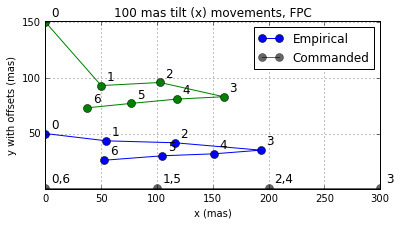

In [20]:
# plot one test

plt.clf()
plt.figure(figsize=(6,3))

# empirical test, 1
mas_x2_rel_baseline = np.subtract(hysteresis_test["mas_x2"][0:7],
                                  hysteresis_test["mas_x2"][0]).values
mas_y2_rel_baseline = np.subtract(hysteresis_test["mas_y2"][0:7],
                                  hysteresis_test["mas_y2"][0]).values
mas_y2_rel_baseline_offset = np.add(mas_y2_rel_baseline,50)

# empirical test, 2
mas_x2_rel_baseline_2 = np.subtract(hysteresis_test_2["mas_x2"][0:7],
                                  hysteresis_test_2["mas_x2"][0]).values
mas_y2_rel_baseline_2 = np.subtract(hysteresis_test_2["mas_y2"][0:7],
                                  hysteresis_test_2["mas_y2"][0]).values
mas_y2_rel_baseline_offset_2 = np.add(mas_y2_rel_baseline_2,150)

text_array_emp = [0,1,2,3,4,5,6]

# commanded
mas_x2_rel_expected = [0,100,200,300]
mas_y2_rel_expected = np.ones(4)
text_array_expect = ["0,6","1,5","2,4","3"]

# plot empirical points, 1
plt.plot(mas_x2_rel_baseline, mas_y2_rel_baseline_offset, '-o', 
         markersize = 8, alpha = 1, label="Empirical")

# plot empirical points, 2
plt.plot(mas_x2_rel_baseline_2, mas_y2_rel_baseline_offset_2, '-o', 
         markersize = 8, alpha = 1)

# plot commanded points
plt.plot(mas_x2_rel_expected, mas_y2_rel_expected, '-o', 
         markersize = 8, color="k", alpha = 0.6, label="Commanded")

# plot annotation, empirical 1 and 2
for i in range(0,7):
    plt.text(mas_x2_rel_baseline[i]+5, mas_y2_rel_baseline_offset[i]+5,
             str(text_array_emp[i]), color="k", fontsize=12)
    plt.text(mas_x2_rel_baseline_2[i]+5, mas_y2_rel_baseline_offset_2[i]+5,
             str(text_array_emp[i]), color="k", fontsize=12)

# plot annotation, commanded
for i in range(0,4):
    plt.text(mas_x2_rel_expected[i]+5, mas_y2_rel_expected[i]+5,
             str(text_array_expect[i]), color="k", fontsize=12)

major_ticks = np.arange(-200, 401, 50)                                              
plt.xticks(major_ticks)                                                       
plt.yticks(major_ticks) 
plt.xlim([-10,350])
plt.ylim([-51,201])
plt.grid(True)
plt.axis("equal")
plt.xlabel("x (mas)")
plt.ylabel("y with offsets (mas)")
plt.tight_layout()
plt.legend()
plt.title("100 mas tilt (x) movements, FPC")
#plt.scatter(hysteresis_test["x2"],hysteresis_test["y2"])
plt.show()

# This is just one plot; don't put this plot into SPIE article

<Figure size 432x288 with 0 Axes>

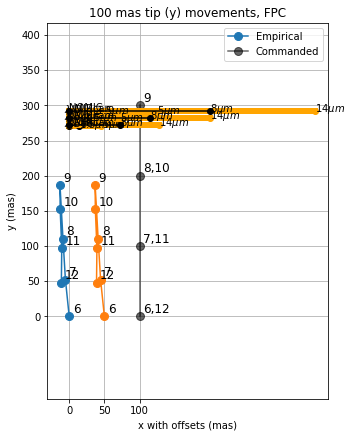

In [161]:
# plot one test

plt.clf()
plt.figure(figsize=(5,6))

# empirical test, 1
mas_x2_rel_baseline = np.subtract(hysteresis_test["mas_x2"][6:13],
                                  hysteresis_test["mas_x2"][6]).values
mas_y2_rel_baseline = np.subtract(hysteresis_test["mas_y2"][6:13],
                                  hysteresis_test["mas_y2"][6]).values
mas_x2_rel_baseline_offset = np.add(mas_x2_rel_baseline,0)

# empirical test, 2
mas_x2_rel_baseline_2 = np.subtract(hysteresis_test_2["mas_x2"][6:13],
                                  hysteresis_test_2["mas_x2"][6]).values
mas_y2_rel_baseline_2 = np.subtract(hysteresis_test_2["mas_y2"][6:13],
                                  hysteresis_test_2["mas_y2"][6]).values
mas_x2_rel_baseline_offset_2 = np.add(mas_x2_rel_baseline_2,50)

text_array_emp = [6,7,8,9,10,11,12]

# commanded
mas_x2_rel_expected = 100*np.ones(4)
mas_y2_rel_expected = [0,100,200,300]
text_array_expect = ["6,12","7,11","8,10","9"]

# plot empirical points, 1
plt.plot(mas_x2_rel_baseline_offset, mas_y2_rel_baseline, '-o', 
         markersize = 8, alpha = 1, label="Empirical")

# plot empirical points, 2
plt.plot(mas_x2_rel_baseline_offset_2, mas_y2_rel_baseline_2, '-o', 
         markersize = 8, alpha = 1)

# plot commanded points
plt.plot(mas_x2_rel_expected, mas_y2_rel_expected, '-o', 
         markersize = 8, color="k", alpha = 0.6, label="Commanded")

# plot annotation, empirical 1 and 2
for i in range(0,7):
    plt.text(mas_x2_rel_baseline_offset[i]+5, mas_y2_rel_baseline[i]+5,
             str(text_array_emp[i]), color="k", fontsize=12)
    plt.text(mas_x2_rel_baseline_offset_2[i]+5, mas_y2_rel_baseline_2[i]+5,
             str(text_array_emp[i]), color="k", fontsize=12)

# plot annotation, commanded
for i in range(0,4):
    plt.text(mas_x2_rel_expected[i]+5, mas_y2_rel_expected[i]+5,
             str(text_array_expect[i]), color="k", fontsize=12)

    
### plot bars for scale

## lambda/D
plt.text(-7,290,
         "$\lambda/D$", color="k")
# LMIR wavelengths
plt.text(0,290.5,
         "LMIRcam", color="k")
plt.text(lambda_D_1pt5,288.5,
         "1.5$\mu m$", color="k")
plt.text(lambda_D_5,288.5,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(0,292.5,
         "NOMIC", color="k")
plt.text(lambda_D_8,290.5,
         "8$\mu m$", color="k")
plt.text(lambda_D_14,290.5,
         "14$\mu m$", color="k")
# lines
plt.plot([0,lambda_D_5],[290,290],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_D_1pt5],[290,290],'o-',color="k")
plt.plot([0,lambda_D_14],[292,292],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_D_8],[292,292],'o-',color="k")

## lambda/Bcc
plt.text(-7,280,
         "$\lambda/Bcc$", color="k")
# LMIR wavelengths
plt.text(0,280.5,
         "LMIRcam", color="k")
plt.text(lambda_Bcc_1pt5,278.5,
         "1.5$\mu m$", color="k")
plt.text(lambda_Bcc_5,278.5,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(0,282.5,
         "NOMIC", color="k")
plt.text(lambda_Bcc_8,280.5,
         "8$\mu m$", color="k")
plt.text(lambda_Bcc_14,280.5,
         "14$\mu m$", color="k")
# lines
plt.plot([0,lambda_Bcc_5],[280,280],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_Bcc_1pt5],[280,280],'o-',color="k")
plt.plot([0,lambda_Bcc_14],[282,282],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_Bcc_8],[282,282],'o-',color="k")

## lambda/Bee
plt.text(-7,270,
         "$\lambda/Bee$", color="k")
# LMIR wavelengths
plt.text(0,270.5,
         "LMIRcam", color="k")
plt.text(lambda_Bee_1pt5,268.5,
         "1.5$\mu m$", color="k")
plt.text(lambda_Bee_5+1,268.5,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(0,272.5,
         "NOMIC", color="k")
plt.text(lambda_Bee_8,270.5,
         "8$\mu m$", color="k")
plt.text(lambda_Bee_14,270.5,
         "14$\mu m$", color="k")
# lines
plt.plot([0,lambda_Bee_5],[270,270],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_Bee_1pt5],[270,270],'o-',color="k")
plt.plot([0,lambda_Bee_14],[272,272],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_Bee_8],[272,272],'o-',color="k")
    

    
major_ticks_x = np.arange(0, 101, 50)  
major_ticks_y = np.arange(0, 401, 50) 
plt.xticks(major_ticks_x)                                                       
plt.yticks(major_ticks_y) 
plt.xlim([-50,150])
plt.ylim([-20,350])
plt.grid(True)
plt.axis("equal")
plt.xlabel("x with offsets (mas)")
plt.ylabel("y (mas)")
plt.legend()
plt.tight_layout()
plt.title("100 mas tip (y) movements, FPC")
#plt.scatter(hysteresis_test["x2"],hysteresis_test["y2"])
plt.show()

# Put this plot into SPIE article

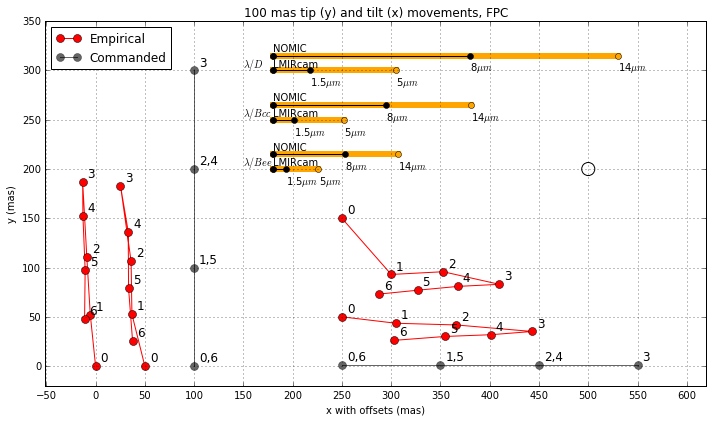

In [11]:
# plot two tests

plt.clf()
plt.figure(figsize=(10,6))

########################################################################
# TIP (y)

# empirical test, 1
mas_x2_rel_baseline = np.subtract(hysteresis_test["mas_x2"][6:13],
                                  hysteresis_test["mas_x2"][6]).values
mas_y2_rel_baseline = np.subtract(hysteresis_test["mas_y2"][6:13],
                                  hysteresis_test["mas_y2"][6]).values
mas_x2_rel_baseline_offset = np.add(mas_x2_rel_baseline,0)

# empirical test, 2
mas_x2_rel_baseline_2 = np.subtract(hysteresis_test_2["mas_x2"][6:13],
                                  hysteresis_test_2["mas_x2"][6]).values
mas_y2_rel_baseline_2 = np.subtract(hysteresis_test_2["mas_y2"][6:13],
                                  hysteresis_test_2["mas_y2"][6]).values
mas_x2_rel_baseline_offset_2 = np.add(mas_x2_rel_baseline_2,50)

#text_array_emp = [6,7,8,9,10,11,12]
text_array_emp = [0,1,2,3,4,5,6]

# commanded
mas_x2_rel_expected = 100*np.ones(4)
mas_y2_rel_expected = [0,100,200,300]
#text_array_expect = ["6,12","7,11","8,10","9"]
text_array_expect = ["0,6","1,5","2,4","3"]
# plot empirical points, 1
plt.plot(mas_x2_rel_baseline_offset, mas_y2_rel_baseline, '-o', 
         markersize = 8, alpha = 1, color="r", label="Empirical")

# plot empirical points, 2
plt.plot(mas_x2_rel_baseline_offset_2, mas_y2_rel_baseline_2, '-o', 
         markersize = 8, alpha = 1, color="r")

# plot commanded points
plt.plot(mas_x2_rel_expected, mas_y2_rel_expected, '-o', 
         markersize = 8, color="k", alpha = 0.6, label="Commanded")

# plot annotation, empirical 1 and 2
for i in range(0,7):
    plt.text(mas_x2_rel_baseline_offset[i]+5, mas_y2_rel_baseline[i]+5,
             str(text_array_emp[i]), color="k", fontsize=12)
    plt.text(mas_x2_rel_baseline_offset_2[i]+5, mas_y2_rel_baseline_2[i]+5,
             str(text_array_emp[i]), color="k", fontsize=12)

# plot annotation, commanded
for i in range(0,4):
    plt.text(mas_x2_rel_expected[i]+5, mas_y2_rel_expected[i]+5,
             str(text_array_expect[i]), color="k", fontsize=12)

    
    
########################################################################
# TILT (x)

# empirical test, 1
mas_x2_rel_baseline_tilt = np.subtract(hysteresis_test["mas_x2"][0:7],
                                  hysteresis_test["mas_x2"][0]).values
mas_y2_rel_baseline_tilt = np.subtract(hysteresis_test["mas_y2"][0:7],
                                  hysteresis_test["mas_y2"][0]).values
mas_y2_rel_baseline_tilt_offset = np.add(mas_y2_rel_baseline_tilt,50)

# empirical test, 2
mas_x2_rel_baseline_tilt_2 = np.subtract(hysteresis_test_2["mas_x2"][0:7],
                                  hysteresis_test_2["mas_x2"][0]).values
mas_y2_rel_baseline_tilt_2 = np.subtract(hysteresis_test_2["mas_y2"][0:7],
                                  hysteresis_test_2["mas_y2"][0]).values
mas_y2_rel_baseline_tilt_offset_2 = np.add(mas_y2_rel_baseline_tilt_2,150)

text_array_emp_tilt = [0,1,2,3,4,5,6]

# commanded
mas_x2_rel_expected_tilt = [0,100,200,300]
mas_y2_rel_expected_tilt = np.ones(4)
text_array_expect_tilt = ["0,6","1,5","2,4","3"]

# plot empirical points, 1
plt.plot(mas_x2_rel_baseline_tilt+250, mas_y2_rel_baseline_tilt_offset, '-o', 
         markersize = 8, color="r", alpha = 1)

# plot empirical points, 2
plt.plot(mas_x2_rel_baseline_tilt_2+250, mas_y2_rel_baseline_tilt_offset_2, '-o', 
         markersize = 8, color="r", alpha = 1)

# plot commanded points
plt.plot(np.add(mas_x2_rel_expected_tilt,250), mas_y2_rel_expected_tilt, '-o', 
         markersize = 8, color="k", alpha = 0.6)

# plot annotation, empirical 1 and 2
for i in range(0,7):
    plt.text(mas_x2_rel_baseline_tilt[i]+255, mas_y2_rel_baseline_tilt_offset[i]+5,
             str(text_array_emp_tilt[i]), color="k", fontsize=12)
    plt.text(mas_x2_rel_baseline_tilt_2[i]+255, mas_y2_rel_baseline_tilt_offset_2[i]+5,
             str(text_array_emp_tilt[i]), color="k", fontsize=12)

# plot annotation, commanded
for i in range(0,4):
    plt.text(mas_x2_rel_expected_tilt[i]+255, mas_y2_rel_expected_tilt[i]+5,
             str(text_array_expect_tilt[i]), color="k", fontsize=12)


########################################################################  
### plot bars for scale

## lambda/D
plt.text(150,304,
         "$\lambda/D$", color="k")
# LMIR wavelengths
plt.text(180,304,
         "LMIRcam", color="k")
plt.text(180+lambda_D_1pt5,285,
         "1.5$\mu m$", color="k")
plt.text(180+lambda_D_5,285,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(180,320,
         "NOMIC", color="k")
plt.text(180+lambda_D_8,300,
         "8$\mu m$", color="k")
plt.text(180+lambda_D_14,300,
         "14$\mu m$", color="k")
# lines
plt.plot([180,180+lambda_D_5],[300,300],'o-',linewidth=6,color="orange")
plt.plot([180,180+lambda_D_1pt5],[300,300],'o-',color="k")
plt.plot([180,180+lambda_D_14],[315,315],'o-',linewidth=6,color="orange")
plt.plot([180,180+lambda_D_8],[315,315],'o-',color="k")

## lambda/Bcc
plt.text(150,254,
         "$\lambda/Bcc$", color="k")
# LMIR wavelengths
plt.text(180,254,
         "LMIRcam", color="k")
plt.text(180+lambda_Bcc_1pt5,235,
         "1.5$\mu m$", color="k")
plt.text(180+lambda_Bcc_5,235,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(180,270,
         "NOMIC", color="k")
plt.text(180+lambda_Bcc_8,250,
         "8$\mu m$", color="k")
plt.text(180+lambda_Bcc_14,250,
         "14$\mu m$", color="k")
# lines
plt.plot([180,180+lambda_Bcc_5],[250,250],'o-',linewidth=6,color="orange")
plt.plot([180,180+lambda_Bcc_1pt5],[250,250],'o-',color="k")
plt.plot([180,180+lambda_Bcc_14],[265,265],'o-',linewidth=6,color="orange")
plt.plot([180,180+lambda_Bcc_8],[265,265],'o-',color="k")

## lambda/Bee
plt.text(150,204,
         "$\lambda/Bee$", color="k")
# LMIR wavelengths
plt.text(180,204,
         "LMIRcam", color="k")
plt.text(180+lambda_Bee_1pt5,185,
         "1.5$\mu m$", color="k")
plt.text(180+lambda_Bee_5+1,185,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(180,219,
         "NOMIC", color="k")
plt.text(180+lambda_Bee_8,200,
         "8$\mu m$", color="k")
plt.text(180+lambda_Bee_14,200,
         "14$\mu m$", color="k")
# lines
plt.plot([180,180+lambda_Bee_5],[200,200],'o-',linewidth=6,color="orange")
plt.plot([180,180+lambda_Bee_1pt5],[200,200],'o-',color="k")
plt.plot([180,180+lambda_Bee_14],[215,215],'o-',linewidth=6,color="orange")
plt.plot([180,180+lambda_Bee_8],[215,215],'o-',color="k")

# circle to show uncertainty
plt.gca().add_patch(patches.Circle((500,200),
                             radius=6.63212469226,
                             color='k', linewidth=1, linestyle="-", fill=False))
    
major_ticks_x = np.arange(-50, 601, 50)  
major_ticks_y = np.arange(-50, 401, 50) 
plt.xticks(major_ticks_x)                                                       
plt.yticks(major_ticks_y) 
plt.xlim([-51,620])
plt.ylim([-20,350])
plt.grid(True)
plt.gca().set_aspect('equal')
plt.xlabel("x with offsets (mas)")
plt.ylabel("y (mas)")
plt.legend(loc="upper left")
plt.tight_layout()
plt.title("100 mas tip (y) and tilt (x) movements, FPC")
#plt.scatter(hysteresis_test["x2"],hysteresis_test["y2"])
plt.savefig("fpc_large.pdf")
#plt.show()

hysteresis_test_2

18480.4994075
10535.4695597


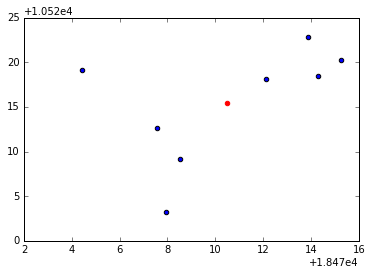

13     7.109792
14     8.050821
15     4.814095
16     3.113848
17     6.740728
18     4.088416
19     6.641304
20    12.497993
Name: mas_x2, dtype: float64
6.63212469226


In [90]:
# find a rough uncertainty with PSFs when they don't move

# SPC: no movement frames 231-243
# (I'm worried about this sequence, because there appears to be real drift in the PSF)
#plt.clf()
#plt.scatter(hysteresis_test_2["mas_x1"][1:13],hysteresis_test_2["mas_y1"][1:13])
#plt.show()

# FPC: no movement frames 244-251
plt.clf()
plt.scatter(hysteresis_test_2["mas_x2"][13:21],hysteresis_test_2["mas_y2"][13:21])
#plt.show()

# find central x,y
x_ave = np.mean(hysteresis_test_2["mas_x2"][13:21])
y_ave = np.mean(hysteresis_test_2["mas_y2"][13:21])
print(x_ave)
print(y_ave)

# find radial distances
# r = sqrt((x-x_ave)^2 + (y-y_ave)^2)

x_sqd_term = np.power(np.subtract(hysteresis_test_2["mas_x2"][13:21],x_ave),2)

y_sqd_term = np.power(np.subtract(hysteresis_test_2["mas_y2"][13:21],y_ave),2)

r_array = np.sqrt(np.add(x_sqd_term,y_sqd_term))

plt.scatter([x_ave],[y_ave], color="r")
plt.show()

print(r_array)
print(np.mean(r_array))

16701.6555387
12167.5250727


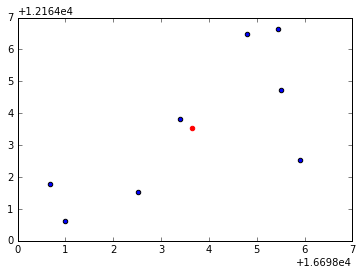

13    3.603012
14    3.181579
15    2.208108
16    2.450466
17    0.403894
18    2.287201
19    3.928235
20    3.455557
Name: mas_x2, dtype: float64
2.68975656939


In [160]:
# find a rough uncertainty with PSFs when they don't move

# SPC: no movement frames 231-243
# (I'm worried about this sequence, because there appears to be real drift in the PSF)
#plt.clf()
#plt.scatter(hysteresis_test_2["mas_x1"][1:13],hysteresis_test_2["mas_y1"][1:13])
#plt.show()

# FPC: no movement frames 244-251
plt.clf()
plt.scatter(hysteresis_test["mas_x2"][13:21],hysteresis_test["mas_y2"][13:21])
#plt.show()

# find central x,y
x_ave = np.mean(hysteresis_test["mas_x2"][13:21])
y_ave = np.mean(hysteresis_test["mas_y2"][13:21])
print(x_ave)
print(y_ave)

# find radial distances
# r = sqrt((x-x_ave)^2 + (y-y_ave)^2)

x_sqd_term = np.power(np.subtract(hysteresis_test["mas_x2"][13:21],x_ave),2)

y_sqd_term = np.power(np.subtract(hysteresis_test["mas_y2"][13:21],y_ave),2)

r_array = np.sqrt(np.add(x_sqd_term,y_sqd_term))

plt.scatter([x_ave],[y_ave], color="r")
plt.show()

print(r_array)
print(np.mean(r_array))

In [36]:
hysteresis_test_2

,frame_ref,img_name,x_ll,y_ll,x_ur,y_ur,remarks,mas_x1,mas_y1,mas_x2,mas_y2
0,0,dark_subt_0231.fits,910.261567,676.905840,1725.342532,990.567171,baseline,9739.798771,7242.892491,18461.165091,10599.068733
1,1,dark_subt_0232.fits,882.884763,661.973166,1730.020942,985.239907,FPC (top PSF) tilted to the right by 0.10 asec,9446.866962,7083.112871,18511.224076,10542.067005
2,2,dark_subt_0233.fits,882.381779,661.746211,1734.946108,985.498959,another step like the above,9441.485035,7080.684461,18563.923358,10544.838864
3,3,dark_subt_0234.fits,881.784335,661.525693,1740.275602,984.305038,another step like the above,9435.092387,7078.324919,18620.948937,10532.063901
4,4,dark_subt_0235.fits,881.448193,661.218947,1736.344079,984.106709,FPC (top PSF) tilted to the left by 0.10 asec,9431.495661,7075.042736,18578.881641,10529.941788
5,5,dark_subt_0236.fits,881.118874,661.057008,1732.530365,983.745578,another step like the above,9427.971947,7073.309985,18538.074905,10526.077686
6,6,dark_subt_0237.fits,880.565376,660.584073,1728.848187,983.377366,another step like the above (should be at star...,9422.049519,7068.249584,18498.675599,10522.137813
7,7,dark_subt_0238.fits,879.726288,660.452999,1727.624104,988.293846,FPC (top PSF) tipped up by 0.10 asec,9413.071286,7066.847094,18485.577913,10574.744149
8,8,dark_subt_0239.fits,879.329903,660.429500,1727.544827,993.319694,another step like the above,9408.829958,7066.595647,18484.729654,10628.520723
9,9,dark_subt_0240.fits,878.836848,659.943621,1726.536749,1000.484482,another step like the above,9403.554273,7061.396744,18473.943212,10705.183958


In [12]:
# kludge to get non-consecutive values together in the right order

pt_21_x2 = hysteresis_test_2["mas_x2"][21]
pt_25_x2 = hysteresis_test_2["mas_x2"][22]
pt_26_x2 = hysteresis_test_2["mas_x2"][23]
pt_27_x2 = hysteresis_test_2["mas_x2"][24]
pt_base2_x2 = hysteresis_test_2["mas_x2"][25] # this point should be overlapped with the previous one, as it is a renorm
pt_22_x2 = hysteresis_test_2["mas_x2"][26]
pt_23_x2 = hysteresis_test_2["mas_x2"][27]
pt_24_x2 = hysteresis_test_2["mas_x2"][28]

pt_21_y2 = hysteresis_test_2["mas_y2"][21]
pt_25_y2 = hysteresis_test_2["mas_y2"][22]
pt_26_y2 = hysteresis_test_2["mas_y2"][23]
pt_27_y2 = hysteresis_test_2["mas_y2"][24]
pt_base2_y2 = hysteresis_test_2["mas_y2"][25] # this point should be overlapped with the previous one, as it is a renorm
pt_22_y2 = hysteresis_test_2["mas_y2"][26]
pt_23_y2 = hysteresis_test_2["mas_y2"][27]
pt_24_y2 = hysteresis_test_2["mas_y2"][28]

frames_21_to_27_x2 = [pt_21_x2,pt_25_x2,pt_26_x2,pt_27_x2]
frames_21_to_27_y2 = [pt_21_y2,pt_25_y2,pt_26_y2,pt_27_y2]

frames_21_to_27_x2_norm = np.subtract(frames_21_to_27_x2,frames_21_to_27_x2[0])
frames_21_to_27_y2_norm = np.subtract(frames_21_to_27_y2,frames_21_to_27_y2[0])

frames_base2_to_24_x2 = [pt_base2_x2,pt_22_x2,pt_23_x2,pt_24_x2]
frames_base2_to_24_y2 = [pt_base2_y2,pt_22_y2,pt_23_y2,pt_24_y2]

frames_base2_to_24_x2_norm = np.add(np.subtract(frames_base2_to_24_x2,frames_base2_to_24_x2[0]),
                                    frames_21_to_27_x2_norm[-1])
frames_base2_to_24_y2_norm = np.add(np.subtract(frames_base2_to_24_y2,frames_base2_to_24_y2[0]),
                                    frames_21_to_27_y2_norm[-1])

# n.b. the [1:] is necessary because the first point of frames_base2_to_24_x2_norm is the new baseline and
# is the same as the last of frames_21_to_27_x2_norm,
conc_x2 = np.concatenate((frames_21_to_27_x2_norm,frames_base2_to_24_x2_norm[1:]), axis=0)
conc_y2 = np.concatenate((frames_21_to_27_y2_norm,frames_base2_to_24_y2_norm[1:]), axis=0)

# Put this plot into SPIE article

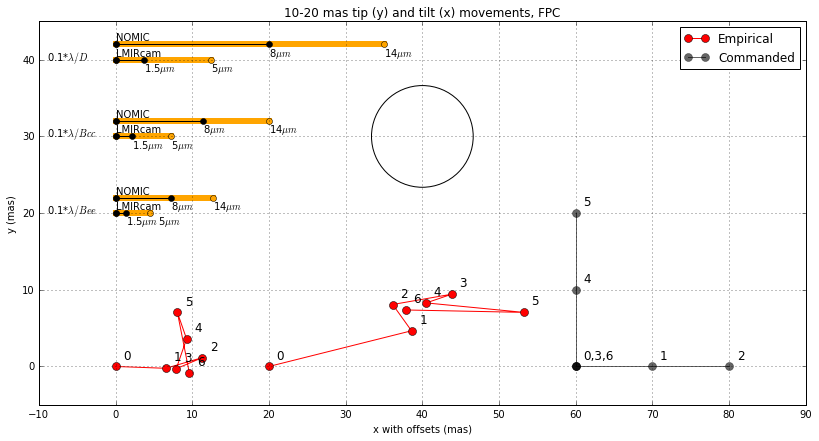

In [13]:
# plot one test

plt.clf()
plt.figure(figsize=(12,6))

# empirical test, 1
mas_x2_rel_baseline = np.subtract(hysteresis_test["mas_x2"][21:28],
                                  hysteresis_test["mas_x2"][21]).values
mas_y2_rel_baseline = np.subtract(hysteresis_test["mas_y2"][21:28],
                                  hysteresis_test["mas_y2"][21]).values
mas_x2_rel_baseline_offset = np.add(mas_x2_rel_baseline,0)

# empirical test, 2
mas_x2_rel_baseline_2 = conc_x2
mas_y2_rel_baseline_2 = conc_y2
mas_x2_rel_baseline_offset_2 = np.add(mas_x2_rel_baseline_2,20)

#text_array_emp = [21,22,23,24,25,26,27]
text_array_emp = [0,1,2,3,4,5,6]

# commanded
mas_x2_rel_expected = np.add(60,[0,10,20,0,0,0,0])
mas_y2_rel_expected = [0,0,0,0,10,20,0]
#text_array_expect = ["21,24,27","22","23","","25","26",""]
text_array_expect = ["0,3,6","1","2","","4","5",""]

# plot empirical points, 1
plt.plot(mas_x2_rel_baseline_offset, mas_y2_rel_baseline, '-o', 
         markersize = 8, alpha = 1, label="Empirical", color="r")

# plot empirical points, 2
plt.plot(mas_x2_rel_baseline_offset_2, mas_y2_rel_baseline_2, '-o', 
         markersize = 8, alpha = 1, color="r")

# plot commanded points
plt.plot(mas_x2_rel_expected, mas_y2_rel_expected, '-o', 
         markersize = 8, color="k", alpha = 0.6, label="Commanded")

# plot annotation, empirical 1 and 2
for i in range(0,7):
    plt.text(mas_x2_rel_baseline_offset[i]+1, mas_y2_rel_baseline[i]+1,
             str(text_array_emp[i]), color="k", fontsize=12)
    plt.text(mas_x2_rel_baseline_offset_2[i]+1, mas_y2_rel_baseline_2[i]+1,
             str(text_array_emp[i]), color="k", fontsize=12)

# plot annotation, commanded
for i in range(0,7):
    plt.text(mas_x2_rel_expected[i]+1, mas_y2_rel_expected[i]+1,
             str(text_array_expect[i]), color="k", fontsize=12)
    

### plot bars for scale

## lambda/D
plt.text(-9,40,
         "0.1*$\lambda/D$", color="k")
# LMIR wavelengths
plt.text(0,40.5,
         "LMIRcam", color="k")
plt.text(0.1*lambda_D_1pt5,38.5,
         "1.5$\mu m$", color="k")
plt.text(0.1*lambda_D_5,38.5,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(0,42.5,
         "NOMIC", color="k")
plt.text(0.1*lambda_D_8,40.5,
         "8$\mu m$", color="k")
plt.text(0.1*lambda_D_14,40.5,
         "14$\mu m$", color="k")
# lines
plt.plot([0,0.1*lambda_D_5],[40,40],'o-',linewidth=6,color="orange")
plt.plot([0,0.1*lambda_D_1pt5],[40,40],'o-',color="k")
plt.plot([0,0.1*lambda_D_14],[42,42],'o-',linewidth=6,color="orange")
plt.plot([0,0.1*lambda_D_8],[42,42],'o-',color="k")

## lambda/Bcc
plt.text(-9,30,
         "0.1*$\lambda/Bcc$", color="k")
# LMIR wavelengths
plt.text(0,30.5,
         "LMIRcam", color="k")
plt.text(0.1*lambda_Bcc_1pt5,28.5,
         "1.5$\mu m$", color="k")
plt.text(0.1*lambda_Bcc_5,28.5,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(0,32.5,
         "NOMIC", color="k")
plt.text(0.1*lambda_Bcc_8,30.5,
         "8$\mu m$", color="k")
plt.text(0.1*lambda_Bcc_14,30.5,
         "14$\mu m$", color="k")
# lines
plt.plot([0,0.1*lambda_Bcc_5],[30,30],'o-',linewidth=6,color="orange")
plt.plot([0,0.1*lambda_Bcc_1pt5],[30,30],'o-',color="k")
plt.plot([0,0.1*lambda_Bcc_14],[32,32],'o-',linewidth=6,color="orange")
plt.plot([0,0.1*lambda_Bcc_8],[32,32],'o-',color="k")

## lambda/Bee
plt.text(-9,20,
         "0.1*$\lambda/Bee$", color="k")
# LMIR wavelengths
plt.text(0,20.5,
         "LMIRcam", color="k")
plt.text(0.1*lambda_Bee_1pt5,18.5,
         "1.5$\mu m$", color="k")
plt.text(0.1*lambda_Bee_5+1,18.5,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(0,22.5,
         "NOMIC", color="k")
plt.text(0.1*lambda_Bee_8,20.5,
         "8$\mu m$", color="k")
plt.text(0.1*lambda_Bee_14,20.5,
         "14$\mu m$", color="k")
# lines
plt.plot([0,0.1*lambda_Bee_5],[20,20],'o-',linewidth=6,color="orange")
plt.plot([0,0.1*lambda_Bee_1pt5],[20,20],'o-',color="k")
plt.plot([0,0.1*lambda_Bee_14],[22,22],'o-',linewidth=6,color="orange")
plt.plot([0,0.1*lambda_Bee_8],[22,22],'o-',color="k")

# circle to show uncertainty
plt.gca().add_patch(patches.Circle((40,30),
                             radius=6.63212469226,
                             color='k', linewidth=1, linestyle="-", fill=False))

major_ticks_x = np.arange(-20, 91, 10) 
major_ticks_y = np.arange(-20, 401, 10)
plt.xticks(major_ticks_x)                                                     
plt.yticks(major_ticks_y) 
plt.xlim([-10,90])
plt.ylim([-5,45])
plt.grid(True)
#plt.axis("equal")
plt.gca().set_aspect('equal')
plt.xlabel("x with offsets (mas)")
plt.ylabel("y (mas)")
plt.legend()
plt.tight_layout()
plt.title("10-20 mas tip (y) and tilt (x) movements, FPC")
plt.savefig("fpc_small.pdf")
#plt.show()

# SPC movement tests

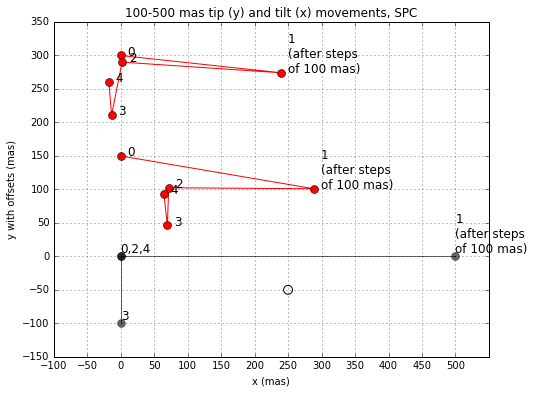

In [19]:
# plot one test: active movement

plt.clf()
plt.figure(figsize=(12,6))

mas_x1_rel_baseline = np.subtract(hysteresis_test["mas_x1"][12:17],
                                  hysteresis_test["mas_x1"][12]).values
mas_y1_rel_baseline = np.subtract(hysteresis_test["mas_y1"][12:17],
                                  hysteresis_test["mas_y1"][12]).values

mas_x2_rel_baseline = np.subtract(hysteresis_test_2["mas_x1"][12:17],
                                  hysteresis_test_2["mas_x1"][12]).values
mas_y2_rel_baseline = np.subtract(hysteresis_test_2["mas_y1"][12:17],
                                  hysteresis_test_2["mas_y1"][12]).values

mas_x1_rel_expected = [0,500,0,0]
mas_y1_rel_expected = [0,0,0,-100]

#text_array_emp = ["12","13\n(after 100 mas steps)","14","15","16"]
#text_array_expect = ["12,14,16","13\n(after 100 mas steps)","","15"]
text_array_emp = ["0","1\n(after steps\nof 100 mas)","2","3","4"]
text_array_expect = ["0,2,4","1\n(after steps\nof 100 mas)","","3"]

plt.plot(mas_x1_rel_baseline, np.add(mas_y1_rel_baseline,150), 
         '-o', markersize = 8, alpha = 1, color="r")
plt.plot(mas_x2_rel_baseline, np.add(mas_y2_rel_baseline,300), 
         '-o', markersize = 8, alpha = 1, color="r")
plt.plot(mas_x1_rel_expected, mas_y1_rel_expected, '-o', markersize = 8, 
         color="k", alpha = 0.6)

for i in range(0,5):
    plt.text(np.add(mas_x1_rel_baseline[i],10), np.add(mas_y1_rel_baseline[i],150),
             str(text_array_emp[i]), color="k", fontsize=12)
    plt.text(np.add(mas_x2_rel_baseline[i],10), np.add(mas_y2_rel_baseline[i],300),
             str(text_array_emp[i]), color="k", fontsize=12)
for i in range(0,4):
    plt.text(mas_x1_rel_expected[i], mas_y1_rel_expected[i]+5,
             str(text_array_expect[i]), color="k", fontsize=12, alpha = 1)
    
# circle to show uncertainty
plt.gca().add_patch(patches.Circle((250,-50),
                             radius=6.63212469226,
                             color='k', linewidth=1, linestyle="-", fill=False))
    
major_ticks = np.arange(-200, 501, 50)                                              
plt.xticks(major_ticks)                                                       
plt.yticks(major_ticks) 
plt.xlim([-100,550])
plt.ylim([-150,350])
plt.grid(True)
plt.gca().set_aspect('equal')
plt.xlabel("x (mas)")
plt.ylabel("y with offsets (mas)")
plt.title("100-500 mas tip (y) and tilt (x) movements, SPC")
#plt.scatter(hysteresis_test["x2"],hysteresis_test["y2"])
plt.savefig("spc_cross.pdf")
plt.show()

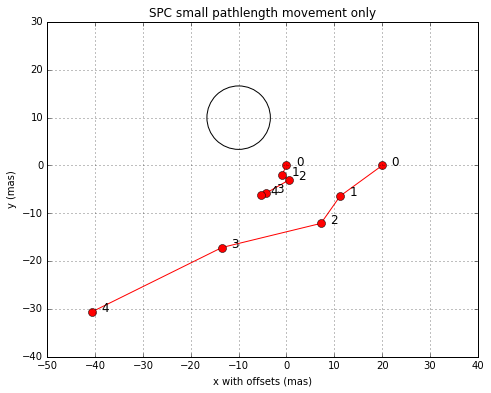

In [15]:
# plot one test: SPC pathlength movement

plt.clf()
plt.figure(figsize=(12,6))

mas_x1_rel_baseline = np.subtract(hysteresis_test["mas_x1"][16:21],
                                  hysteresis_test["mas_x1"][16]).values
mas_y1_rel_baseline = np.subtract(hysteresis_test["mas_y1"][16:21],
                                  hysteresis_test["mas_y1"][16]).values

mas_x2_rel_baseline = np.subtract(hysteresis_test_2["mas_x1"][16:21],
                                  hysteresis_test_2["mas_x1"][16]).values
mas_y2_rel_baseline = np.subtract(hysteresis_test_2["mas_y1"][16:21],
                                  hysteresis_test_2["mas_y1"][16]).values

#mas_x1_rel_expected = [0,500,0,0]
#mas_y1_rel_expected = [0,0,0,-100]

#text_array_emp = [16,17,18,19,20]
text_array_emp = [0,1,2,3,4]

#text_array_expect = ["12,14,16","13","","15"]
plt.plot(mas_x1_rel_baseline, mas_y1_rel_baseline, 
         '-o', markersize = 8, alpha = 1, color="r")
plt.plot(np.add(mas_x2_rel_baseline,20), mas_y2_rel_baseline, 
         '-o', markersize = 8, alpha = 1, color="r")
#plt.plot(mas_x1_rel_expected, mas_y1_rel_expected, '-o', markersize = 8, color="k", alpha = 0.6)
for i in range(0,5):
    plt.text(np.add(mas_x1_rel_baseline[i],2), mas_y1_rel_baseline[i],
             str(text_array_emp[i]), color="k", fontsize=12)
for i in range(0,5):
    plt.text(np.add(mas_x2_rel_baseline[i],22), mas_y2_rel_baseline[i],
             str(text_array_emp[i]), color="k", fontsize=12)
#for i in range(0,3):
#    plt.text(mas_x1_rel_expected[i]+5, mas_y1_rel_expected[i]+5,
#             str(text_array_expect[i]), color="k", fontsize=12, alpha = 0.6)

# circle to show uncertainty
plt.gca().add_patch(patches.Circle((-10,10),
                             radius=6.63212469226,
                             color='k', linewidth=1, linestyle="-", fill=False))

major_ticks = np.arange(-200, 401, 10)                                              
plt.xticks(major_ticks)                                                       
plt.yticks(major_ticks) 
plt.xlim([-50,40])
plt.ylim([-40,30])
plt.grid(True)
plt.gca().set_aspect('equal')
plt.xlabel("x with offsets (mas)")
plt.ylabel("y (mas)")
plt.title("SPC small pathlength movement only")
plt.savefig("spc_small_pl.pdf")
#plt.show()

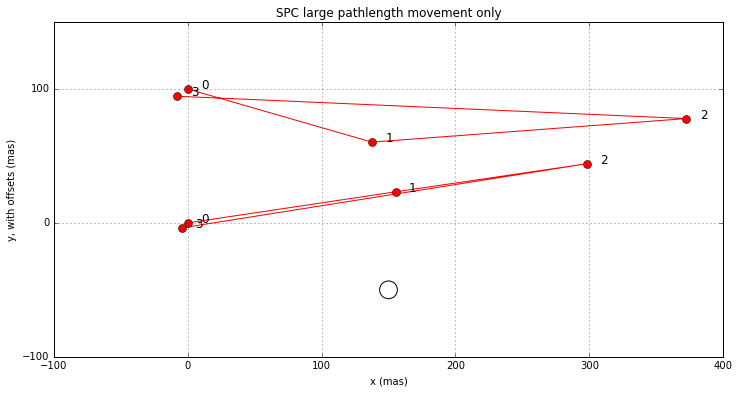

In [16]:
# plot one test: SPC pathlength movement

plt.clf()
plt.figure(figsize=(12,6))

mas_x1_rel_baseline = np.subtract(hysteresis_test["mas_x1"][27:31],
                                  hysteresis_test["mas_x1"][27]).values
mas_y1_rel_baseline = np.subtract(hysteresis_test["mas_y1"][27:31],
                                  hysteresis_test["mas_y1"][27]).values

mas_x2_rel_baseline = np.subtract(hysteresis_test_2["mas_x1"][29:33],
                                  hysteresis_test_2["mas_x1"][29]).values
mas_y2_rel_baseline = np.subtract(hysteresis_test_2["mas_y1"][29:33],
                                  hysteresis_test_2["mas_y1"][29]).values



#text_array_emp = [27,28,29,30]
text_array_emp = [0,1,2,3]

#text_array_expect = ["12,14,16","13","","15"]
plt.plot(mas_x1_rel_baseline, mas_y1_rel_baseline, 
         '-o', markersize = 8, alpha = 1, color="r")
plt.plot(mas_x2_rel_baseline, np.add(mas_y2_rel_baseline,100), 
         '-o', markersize = 8, alpha = 1, color="r")
#plt.plot(mas_x1_rel_expected, mas_y1_rel_expected, '-o', markersize = 8, color="k", alpha = 0.6)
for i in range(0,4):
    plt.text(np.add(mas_x1_rel_baseline[i],10), mas_y1_rel_baseline[i],
             str(text_array_emp[i]), color="k", fontsize=12)
    plt.text(np.add(mas_x2_rel_baseline[i],10), np.add(mas_y2_rel_baseline[i],100),
             str(text_array_emp[i]), color="k", fontsize=12)

# circle to show uncertainty
plt.gca().add_patch(patches.Circle((150,-50),
                             radius=6.63212469226,
                             color='k', linewidth=1, linestyle="-", fill=False))
    
major_ticks = np.arange(-200, 401, 100)                                              
plt.xticks(major_ticks)                                                       
plt.yticks(major_ticks) 
plt.xlim([-100,400])
plt.ylim([-100,150])
plt.grid(True)
plt.gca().set_aspect('equal')
plt.title("SPC large pathlength movement only")
plt.xlabel("x (mas)")
plt.ylabel("y, with offsets (mas)")
plt.savefig("spc_large_pl.pdf")
#plt.show()

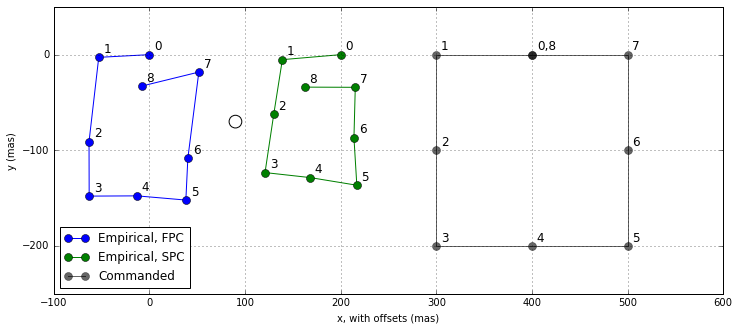

In [52]:
# plot one test: FPC and SPC tip-tilt loop

plt.clf()
plt.figure(figsize=(12,6))

mas_fpc_x_rel_baseline = np.subtract(hysteresis_test_2["mas_x2"][32:],
                                  hysteresis_test_2["mas_x2"][32]).values
mas_fpc_y_rel_baseline = np.subtract(hysteresis_test_2["mas_y2"][32:],
                                  hysteresis_test_2["mas_y2"][32]).values

mas_spc_x_rel_baseline = np.subtract(hysteresis_test_2["mas_x1"][32:],
                                  hysteresis_test_2["mas_x1"][32]).values
mas_spc_y_rel_baseline = np.subtract(hysteresis_test_2["mas_y1"][32:],
                                  hysteresis_test_2["mas_y1"][32]).values

mas_x_expected = [0,-100,-100,-100,0,100,100,100,0]
mas_y_expected = [0,0,-100,-200,-200,-200,-100,0,0]


text_array_emp = [0,1,2,3,4,5,6,7,8]
text_array_expect = ["0,8","1","2","3","4","5","6","7",""]

plt.plot(mas_fpc_x_rel_baseline, mas_fpc_y_rel_baseline, 
         '-o', markersize = 8, alpha = 1, label="Empirical, FPC")
plt.plot(np.add(mas_spc_x_rel_baseline,200), mas_spc_y_rel_baseline, 
         '-o', markersize = 8, alpha = 1, label="Empirical, SPC")
plt.plot(np.add(mas_x_expected,400), mas_y_expected, 
         '-o', markersize = 8, color="k", alpha = 0.6, label="Commanded")
#plt.plot(mas_x1_rel_expected, mas_y1_rel_expected, '-o', markersize = 8, color="k", alpha = 0.6)
for i in range(0,9):
    plt.text(np.add(mas_fpc_x_rel_baseline[i],5), np.add(mas_fpc_y_rel_baseline[i],5),
             str(text_array_emp[i]), color="k", fontsize=12)
    plt.text(np.add(mas_spc_x_rel_baseline[i],205), np.add(mas_spc_y_rel_baseline[i],5),
             str(text_array_emp[i]), color="k", fontsize=12)
for i in range(0,8):
    plt.text(np.add(mas_x_expected[i],405), np.add(mas_y_expected[i],5), str(text_array_expect[i]), color="k", fontsize=12)

# circle to show uncertainty
plt.gca().add_patch(patches.Circle((90,-70),
                             radius=6.63212469226,
                             color='k', linewidth=1, linestyle="-", fill=False))

major_ticks = np.arange(-200, 601, 100)                                              
plt.xticks(major_ticks)                                                       
plt.yticks(major_ticks) 
plt.xlim([-100,600])
plt.ylim([-250,50])
plt.grid(True)
plt.gca().set_aspect('equal')
plt.legend(loc="lower left")
plt.xlabel("x, with offsets (mas)")
plt.ylabel("y (mas)")
plt.savefig("fpc_spc_loop.pdf")
#plt.show()

In [20]:
hysteresis_test_2

,frame_ref,img_name,x_ll,y_ll,x_ur,y_ur,remarks,mas_x1,mas_y1,mas_x2,mas_y2
0,0,dark_subt_0231.fits,910.261567,676.905840,1725.342532,990.567171,baseline,9739.798771,7242.892491,18461.165091,10599.068733
1,1,dark_subt_0232.fits,882.884763,661.973166,1730.020942,985.239907,FPC (top PSF) tilted to the right by 0.10 asec,9446.866962,7083.112871,18511.224076,10542.067005
2,2,dark_subt_0233.fits,882.381779,661.746211,1734.946108,985.498959,another step like the above,9441.485035,7080.684461,18563.923358,10544.838864
3,3,dark_subt_0234.fits,881.784335,661.525693,1740.275602,984.305038,another step like the above,9435.092387,7078.324919,18620.948937,10532.063901
4,4,dark_subt_0235.fits,881.448193,661.218947,1736.344079,984.106709,FPC (top PSF) tilted to the left by 0.10 asec,9431.495661,7075.042736,18578.881641,10529.941788
5,5,dark_subt_0236.fits,881.118874,661.057008,1732.530365,983.745578,another step like the above,9427.971947,7073.309985,18538.074905,10526.077686
6,6,dark_subt_0237.fits,880.565376,660.584073,1728.848187,983.377366,another step like the above (should be at star...,9422.049519,7068.249584,18498.675599,10522.137813
7,7,dark_subt_0238.fits,879.726288,660.452999,1727.624104,988.293846,FPC (top PSF) tipped up by 0.10 asec,9413.071286,7066.847094,18485.577913,10574.744149
8,8,dark_subt_0239.fits,879.329903,660.429500,1727.544827,993.319694,another step like the above,9408.829958,7066.595647,18484.729654,10628.520723
9,9,dark_subt_0240.fits,878.836848,659.943621,1726.536749,1000.484482,another step like the above,9403.554273,7061.396744,18473.943212,10705.183958
